<h1>Import Library</h1>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

<h1>The Data</h1>

In [2]:
df = pd.read_csv(r"C:\Users\\DESKTOP-PC\OneDrive\Pro Career\Data Analyst\WProject\Individual\Oscar Award Project\Dataset\the_oscar_award.csv")
df.columns

Index(['year_film', 'year_ceremony', 'ceremony', 'category', 'name', 'film',
       'winner'],
      dtype='object')

In [3]:
df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10765 entries, 0 to 10764
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10765 non-null  int64 
 1   year_ceremony  10765 non-null  int64 
 2   ceremony       10765 non-null  int64 
 3   category       10765 non-null  object
 4   name           10761 non-null  object
 5   film           10450 non-null  object
 6   winner         10765 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 515.3+ KB


<h1>Data Preparation</h1>

In [5]:
#Deleting unnecessary columns
df_prep = df.drop(['film', 'year_ceremony'], axis=1)
df_prep.sample(5)

,year_film,ceremony,category,name,winner
444,1936,9,ASSISTANT DIRECTOR,Eric G. Stacey,False
2975,1954,27,SHORT SUBJECT (One-reel),"Otto Lang, Producer",False
4100,1964,37,ART DIRECTION (Black-and-White),"Art Direction: George W. Davis, Hans Peters, ...",False
8604,2005,78,DIRECTING,Ang Lee,True
8406,2003,76,MUSIC (Original Score),Gabriel Yared,False


In [6]:
# Filter the DataFrame to include only rows with years from 1970 to 2022
df_prep2 = df_prep[(df_prep['year_film'] >= 1970) & (df_prep['year_film'] <= 2022)]
df_prep2

,year_film,ceremony,category,name,winner
4773,1970,43,ACTOR,Melvyn Douglas,False
4774,1970,43,ACTOR,James Earl Jones,False
4775,1970,43,ACTOR,Jack Nicholson,False
4776,1970,43,ACTOR,Ryan O'Neal,False
4777,1970,43,ACTOR,George C. Scott,True
...,...,...,...,...,...
10760,2022,95,HONORARY AWARD,"To Euzhan Palcy, a masterful filmmaker who bro...",True
10761,2022,95,HONORARY AWARD,"To Diane Warren, for her genius, generosity an...",True
10762,2022,95,HONORARY AWARD,"To Peter Weir, a fearless and consummate filmm...",True
10763,2022,95,GORDON E. SAWYER AWARD,Iain Neil,True


<h1>Data Cleaning</h2>

In [7]:
#Check null values
df_cln = df_prep2.isnull().sum()
df_cln

year_film    0
ceremony     0
category     0
name         4
winner       0
dtype: int64

In [8]:
#Drop null values in column 'name'
df_cln2 = df_prep2.dropna(subset=['name'])
df_cln2.isnull().sum()


year_film    0
ceremony     0
category     0
name         0
winner       0
dtype: int64

In [9]:
df_cln2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5988 entries, 4773 to 10764
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year_film  5988 non-null   int64 
 1   ceremony   5988 non-null   int64 
 2   category   5988 non-null   object
 3   name       5988 non-null   object
 4   winner     5988 non-null   bool  
dtypes: bool(1), int64(2), object(2)
memory usage: 239.8+ KB


<h1>Exploratory Data Analysis</h1>

<h3>The Most Nominated Director</h3>

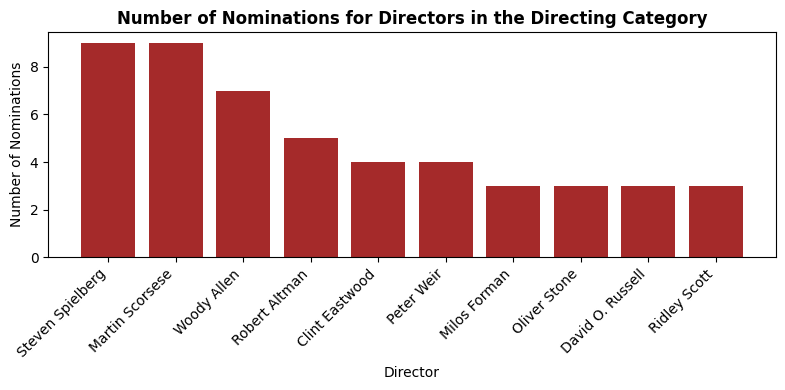

In [10]:
# Filter Category
df_directing = df_cln2[df_cln2['category'] == 'DIRECTING']

# Count each amount for top 10
df_directing_count = df_directing['name'].value_counts().reset_index(name='count').head(10)

# Show Graph
plt.figure(figsize=(8, 4))
plt.bar(df_directing_count['name'], df_directing_count['count'], color='brown')
plt.xlabel('Director')
plt.ylabel('Number of Nominations')
plt.title('Number of Nominations for Directors in the Directing Category', weight='bold')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


<h3>The Most Nominated Writer</h3>

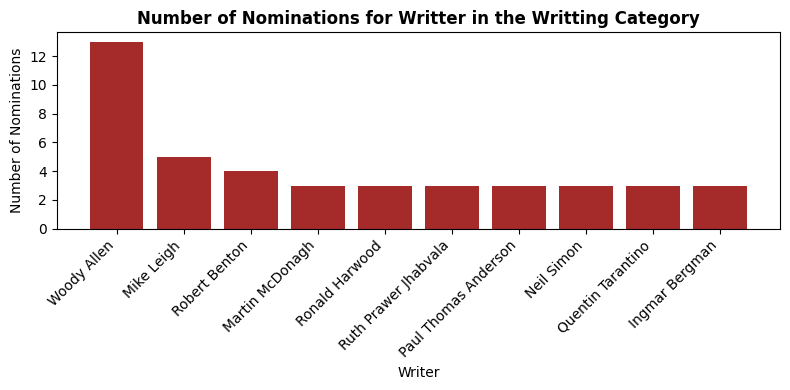

In [11]:
# Filter Category
df_writer= df_cln2[df_cln2['category'].str.contains('WRITING')]

# Remove 'Written by' and 'Screenplay by' on Name column 
df_writer['name'].str.replace('Written by ', '').str.replace('Screenplay by ', '')

# Count each amount for top 10
df_writer_count = df_writer['name'].str.replace('Written by ', '').str.replace('Screenplay by ', '').value_counts().reset_index(name='count').head(10)

# Show Graph
plt.figure(figsize=(8, 4))
plt.bar(df_writer_count['name'], df_writer_count['count'], color='brown')
plt.xlabel('Writer')
plt.ylabel('Number of Nominations')
plt.title('Number of Nominations for Writter in the Writting Category', weight='bold')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

<h3>The Most Nominated Film Editing</h3>

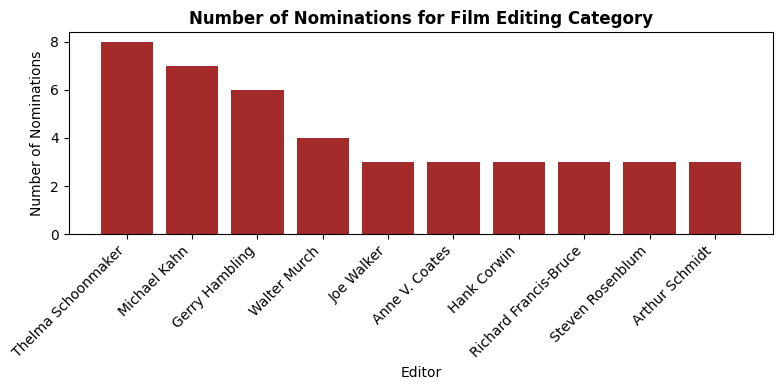

In [12]:
# Filter Category
df_editing= df_cln2[df_cln2['category'].str.contains('FILM EDITING')]

# Count each amount for top 10
df_editing_count = df_editing['name'].value_counts().reset_index(name='count').head(10)

# Show Graph
plt.figure(figsize=(8, 4))
plt.bar(df_editing_count['name'], df_editing_count['count'], color='brown')
plt.xlabel('Editor')
plt.ylabel('Number of Nominations')
plt.title('Number of Nominations for Film Editing Category', weight='bold')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


<h3>The Most Nominated Production Design</h3>

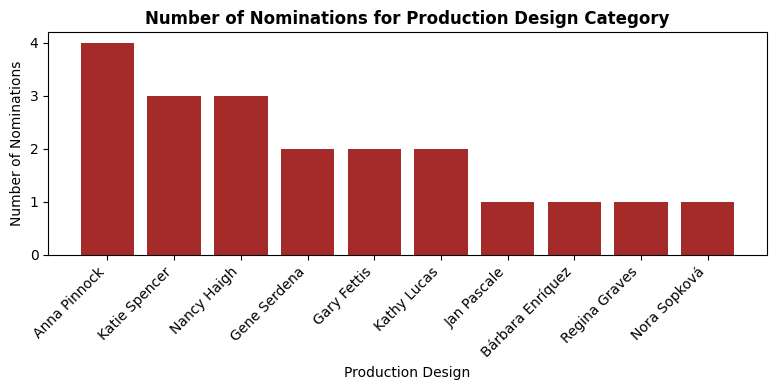

In [13]:
# Filter Category
df_prodes= df_cln2[df_cln2['category'] == 'PRODUCTION DESIGN']

# Remove 'Production Design:' on Name column 
df_prodes1 = df_prodes['name'].str.replace('Production Design: ', '')

# Remove 'Set Decoration:'
df_prodes2 = df_prodes1.str.split('Set Decoration: ').str[-1]


# Count each amount for top 10
df_prodes_count = df_prodes2.value_counts().reset_index(name='count').head(10)

# Show Graph
plt.figure(figsize=(8, 4))
plt.bar(df_prodes_count['name'], df_prodes_count['count'], color='brown')
plt.xlabel('Production Design')
plt.ylabel('Number of Nominations')
plt.title('Number of Nominations for Production Design Category', weight='bold')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


<h3>The Most Nominated Actor Leading Role</h3>

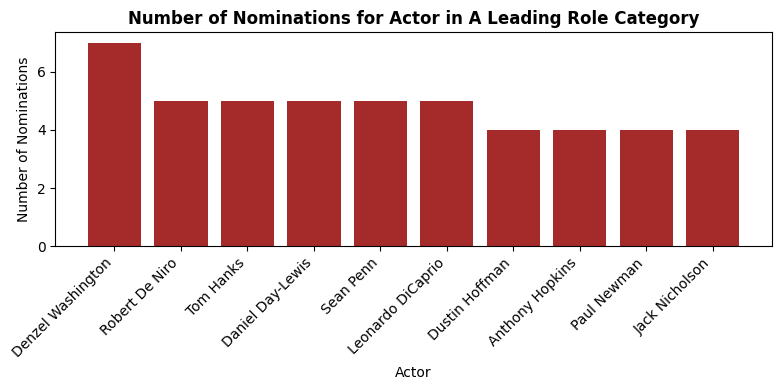

In [14]:
# Filter Category
df_aled= df_cln2[df_cln2['category'] == 'ACTOR IN A LEADING ROLE']

# Count each amount for top 10
df_aled_count = df_aled['name'].value_counts().reset_index(name='count').head(10)

# Show Graph
plt.figure(figsize=(8, 4))
plt.bar(df_aled_count['name'], df_aled_count['count'], color='brown')
plt.xlabel('Actor')
plt.ylabel('Number of Nominations')
plt.title('Number of Nominations for Actor in A Leading Role Category', weight='bold')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


<h3>The Most Nominated Actor Supporting Role</h3>

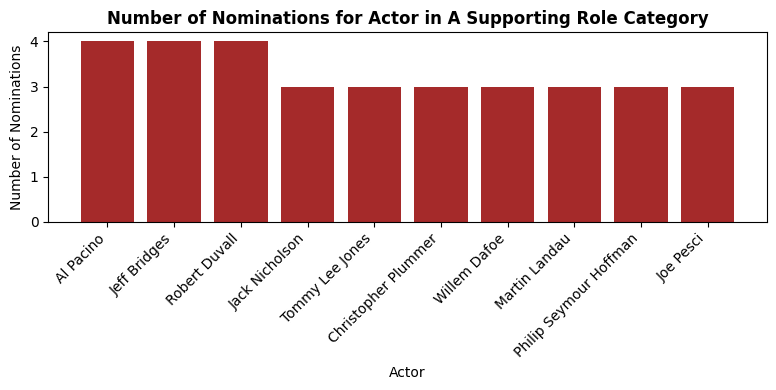

In [15]:
# Filter Category
df_asup= df_cln2[df_cln2['category'] == 'ACTOR IN A SUPPORTING ROLE']

# Count each amount for top 10
df_asup_count = df_asup['name'].value_counts().reset_index(name='count').head(10)

# Show Graph
plt.figure(figsize=(8, 4))
plt.bar(df_asup_count['name'], df_asup_count['count'], color='brown')
plt.xlabel('Actor')
plt.ylabel('Number of Nominations')
plt.title('Number of Nominations for Actor in A Supporting Role Category', weight='bold')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


<h3>The Most Nominated Actress Leading Role</h3>

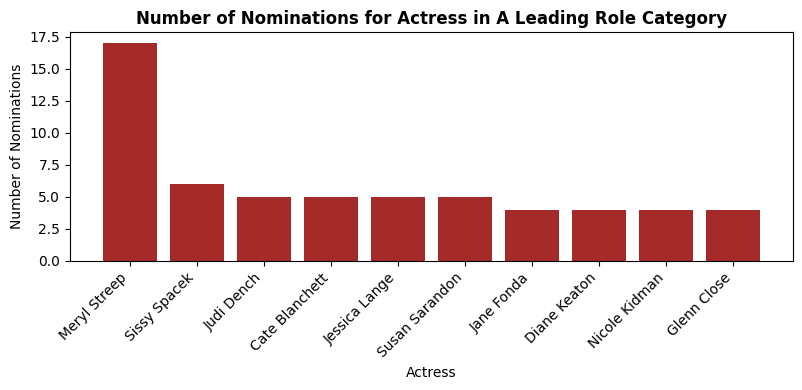

In [16]:
# Filter Category
df_asled= df_cln2[df_cln2['category'] == 'ACTRESS IN A LEADING ROLE']

# Count each amount for top 10
df_asled_count = df_asled['name'].value_counts().reset_index(name='count').head(10)

# Show Graph
plt.figure(figsize=(8, 4))
plt.bar(df_asled_count['name'], df_asled_count['count'], color='brown')
plt.xlabel('Actress')
plt.ylabel('Number of Nominations')
plt.title('Number of Nominations for Actress in A Leading Role Category', weight='bold')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


<h3>The Most Nominated Actress Supporting Role</h3>

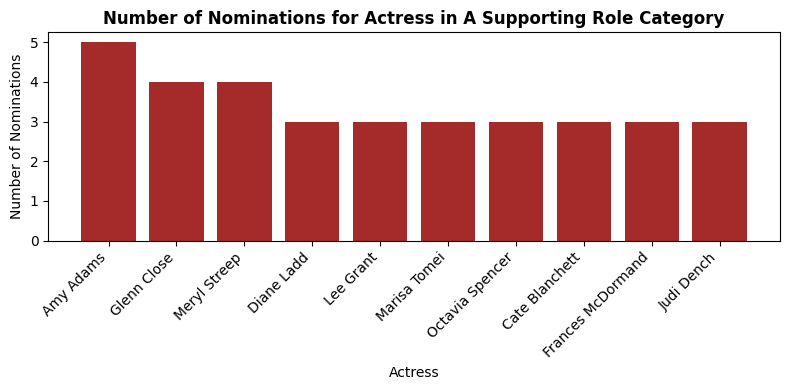

In [17]:
# Filter Category
df_assup= df_cln2[df_cln2['category'] == 'ACTRESS IN A SUPPORTING ROLE']

# Count each amount for top 10
df_assup_count = df_assup['name'].value_counts().reset_index(name='count').head(10)

# Show Graph
plt.figure(figsize=(8, 4))
plt.bar(df_assup_count['name'], df_assup_count['count'], color='brown')
plt.xlabel('Actress')
plt.ylabel('Number of Nominations')
plt.title('Number of Nominations for Actress in A Supporting Role Category', weight='bold')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


<h3>The Most Nominated Cinematography</h3>

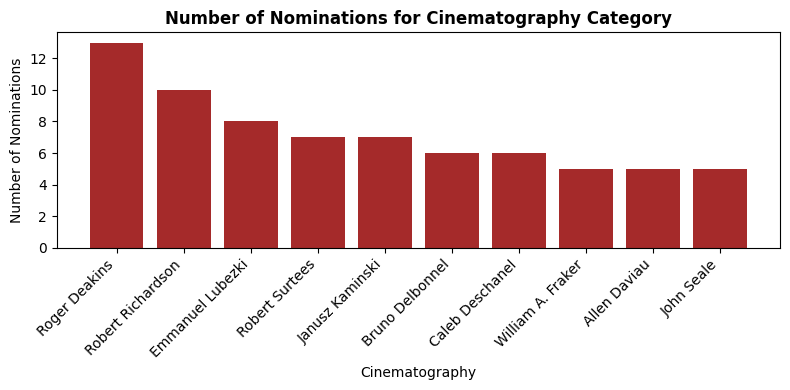

In [18]:
# Filter Category
df_cnm= df_cln2[df_cln2['category'].str.contains('CINEMATOGRAPHY')]

# Count each amount for top 10
df_cnm_count = df_cnm['name'].value_counts().reset_index(name='count').head(10)

# Show Graph
plt.figure(figsize=(8, 4))
plt.bar(df_cnm_count['name'], df_cnm_count['count'], color='brown')
plt.xlabel('Cinematography')
plt.ylabel('Number of Nominations')
plt.title('Number of Nominations for Cinematography Category', weight='bold')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


<h3>The Most Nominated Music (Original Score) Composer</h3>

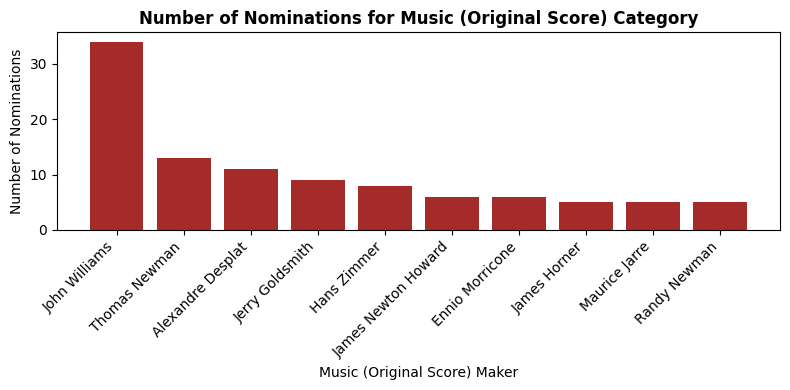

In [19]:
# Filter Category
df_msc= df_cln2[df_cln2['category'] == 'MUSIC (Original Score)']

# Count each amount for top 10
df_msc_count = df_msc['name'].value_counts().reset_index(name='count').head(10)

# Show Graph
plt.figure(figsize=(8, 4))
plt.bar(df_msc_count['name'], df_msc_count['count'], color='brown')
plt.xlabel('Music (Original Score) Maker')
plt.ylabel('Number of Nominations')
plt.title('Number of Nominations for Music (Original Score) Category', weight='bold')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


<h3>The Most Nominated Makeup Artist</h3>

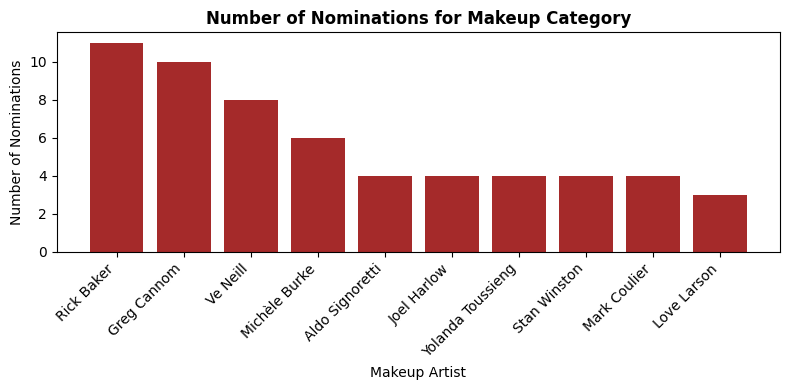

In [20]:
# Filter Category 
df_mkup= df_cln2[df_cln2['category'].str.contains('MAKEUP')]

# Split the 'name' column based on commas or "and"
df_mkup1 = df_mkup['name'].str.replace(', ', '|').str.replace(' and ', '|').str.split('|')

# Make the list to seperate rows
df_mkup2 = df_mkup1.explode('name')

# Count each amount for top 10
df_mkup_count = df_mkup2.value_counts().reset_index(name='count').head(10)

# Show Graph
plt.figure(figsize=(8, 4))
plt.bar(df_mkup_count['name'], df_mkup_count['count'], color='brown')
plt.xlabel('Makeup Artist')
plt.ylabel('Number of Nominations')
plt.title('Number of Nominations for Makeup Category', weight='bold')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


<h3>The Most Nominated Sound Editor</h3>

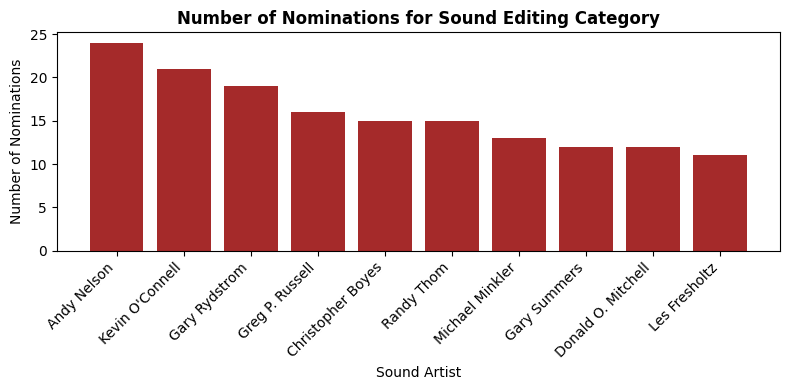

In [21]:
# Filter Category 
df_snd= df_cln2[df_cln2['category'].str.contains('SOUND')]

# Split the 'name' column based on commas or "and"
df_snd1 = df_snd['name'].str.replace(', ', '|').str.replace(' and ', '|').str.split('|')

# Make the list to seperate rows
df_snd2 = df_snd1.explode('name')

# Count each amount for top 10
df_snd_count = df_snd2.value_counts().reset_index(name='count').head(10)

# Show Graph
plt.figure(figsize=(8, 4))
plt.bar(df_snd_count['name'], df_snd_count['count'], color='brown')
plt.xlabel('Sound Artist')
plt.ylabel('Number of Nominations')
plt.title('Number of Nominations for Sound Editing Category', weight='bold')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


<h3>The Most Nominated Visual Effect Artist</h3>

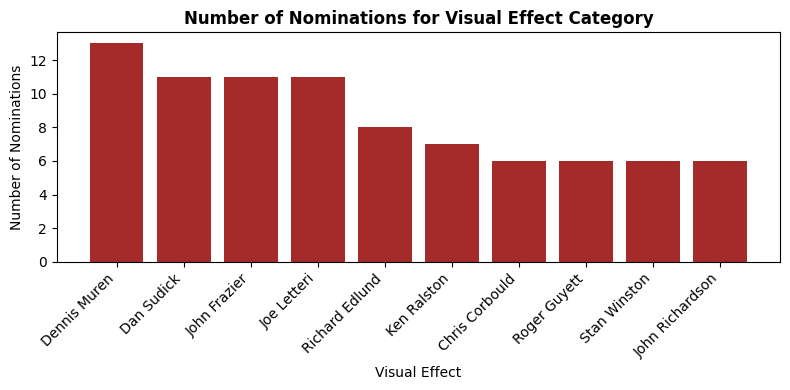

In [22]:
# Filter Category 
df_vis= df_cln2[df_cln2['category'].str.contains('VISUAL EFFECTS')]

# Split the 'name' column based on commas or "and"
df_vis1 = df_vis['name'].str.replace(', ', '|').str.replace(' and ', '|').str.split('|')

# Make the list to seperate rows
df_vis2 = df_vis1.explode('name')

# Count each amount for top 10
df_vis_count = df_vis2.value_counts().reset_index(name='count').head(10)

# Show Graph
plt.figure(figsize=(8, 4))
plt.bar(df_vis_count['name'], df_vis_count['count'], color='brown')
plt.xlabel('Visual Effect')
plt.ylabel('Number of Nominations')
plt.title('Number of Nominations for Visual Effect Category', weight='bold')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()
